In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torchvision.models as models
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent
import torchvision
torch.manual_seed(1) # set the random seed

# obtain data
from torchvision import datasets, transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import the libraries

import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/APS360/8951-20240311T173527Z-001.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content/drive/MyDrive/APS360/Project Data') #Extracts the files into the /tmp folder

zip_ref.close()


In [ ]:
# Load your dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert PIL image to tensor
])

# Replace 'path_to_your_data_folder' with the actual path to your dataset
dataset = ImageFolder(root='/content/drive/MyDrive/APS360/Project Data/8951', transform=transform)


In [ ]:
'''
# Create a new dataset with the additional images
new_dataset = ImageFolder(root='/content/drive/MyDrive/APS360/Project Data/8951', transform=transform)

# Combine the two datasets
combined_dataset = dataset + new_dataset
'''

"\n# Create a new dataset with the additional images\nnew_dataset = ImageFolder(root='/content/drive/MyDrive/APS360/Project Data/8951', transform=transform)\n\n# Combine the two datasets\ncombined_dataset = dataset + new_dataset\n"

In [ ]:
import zipfile
import os

In [ ]:
print(len(dataset))

613


In [ ]:
# prompt: split the image dataset to train test and validation

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
train_set, val_set = train_test_split(train_set, test_size=0.2, random_state=42)

# Create data loaders for each set
train_loader = DataLoader(train_set, batch_size=2, shuffle=True)
val_loader = DataLoader(val_set, batch_size=2, shuffle=True)
test_loader = DataLoader(test_set, batch_size=2, shuffle=True)


In [ ]:
# prompt: give me the size of train_loader

print(len(train_set))


392


In [ ]:
class LabSmallCNN(nn.Module):
    def __init__(self):
        super(LabSmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(4, 5, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(5 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 5 * 56 * 56)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 5, 5) #in_channels, out_chanels, kernel_size
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride
        self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(160, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 160)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    print('Convolutional Neural Network Architecture Done')

Convolutional Neural Network Architecture Done


In [ ]:
# prompt: get accuracy for a binary classification CNN model
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100 * correct / total

In [ ]:
def train(model, data, batch_size=64, num_epochs=1):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            #############################################
            #To Enable GPU Usage
            '''
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            '''
            out = model(imgs)             # forward pass



            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy
            val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy
            n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()
    # Get the confusion matrix for the CNN


    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
!pip install torchmetrics
import torchmetrics
from torchmetrics.classification import ConfusionMatrix


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 10.5 MB/s eta 0:00:00


In [ ]:
# prompt: get confusion matrix for a binary classification cnn

# Get the confusion matrix for the CNN
confusion_matrix = ConfusionMatrix(num_classes=2, task="multiclass")

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        confusion_matrix.update(predicted.flatten(), labels.flatten())

print(confusion_matrix.compute())


tensor([[88,  0],
        [35,  0]])


CNN
LabSmallCNN(
  (conv1): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=15680, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


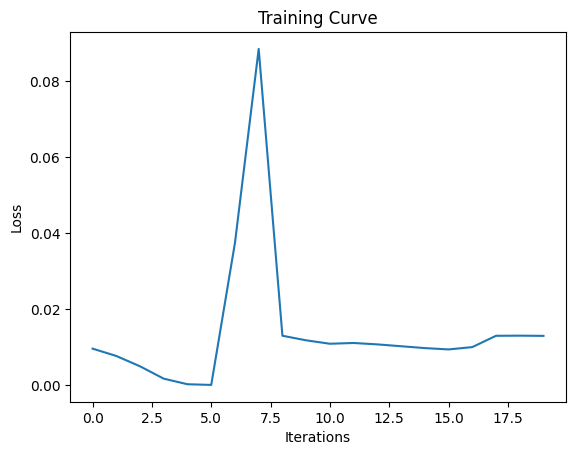

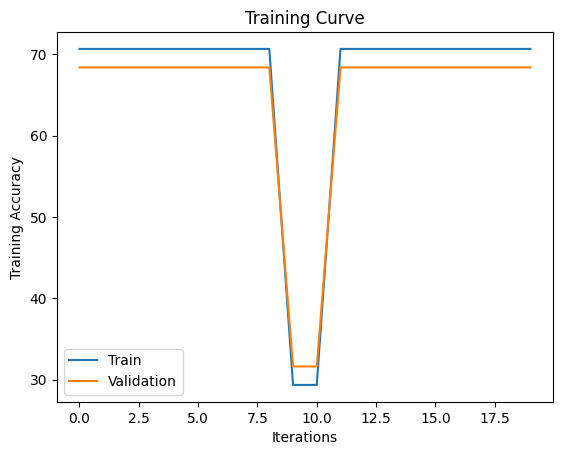

Final Training Accuracy: 70.63621533442088
Final Validation Accuracy: 68.36734693877551


In [ ]:
print("CNN")
model = LabSmallCNN()
print(model)
train(model, dataset, num_epochs=2)


In [ ]:

confusion_matrix = ConfusionMatrix(num_classes=2, task="multiclass")

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        confusion_matrix.update(predicted.flatten(), labels.flatten())

print(confusion_matrix.compute())

[[ 0 88]
 [ 0 35]]
